In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import json

import sys
import os

sys.path.append(os.path.abspath('../'))
from tool import *

import matplotlib.pyplot as plt


data_root = '../../MyData/'

## Load data

In [2]:
# Define a function to load, drop 'Year' column, and rename cluster columns
def load_and_rename(filepath, rename_dict):
    df = pd.read_csv(filepath).drop(columns=['Year'])
    return df.rename(columns=rename_dict)

# Define file paths and corresponding rename mappings
files = {
    "concat": "./1_concat_clusters.csv",
    "avg": "./2_avg_clusters.csv",
    "pca_256": "./3_pca_clusters_256.csv",
    "pca_26": "./3_pca_clusters_26.csv",
    "avg_auto": "./4_avg-auto_clusters.csv",
    "concat_auto": "./4_concat-auto_clusters.csv",
    "cca": "./5_cca.csv",
    "clasf": "./6_clasf.csv",
    "gics": "./7_gics.csv"
}

rename_mappings = {
    "concat": {"cluster_10": "concat_10", "cluster_100": "concat_100"},
    "avg": {"cluster_10": "avg_10", "cluster_100": "avg_100"},
    "pca_256": {"cluster_10": "pca_256_10", "cluster_100": "pca_256_100"},
    "pca_26": {"cluster_10": "pca_26_10", "cluster_100": "pca_26_100"},
    "avg_auto": {"cluster_10": "avg_auto_10", "cluster_100": "avg_auto_100"},
    "concat_auto": {"cluster_10": "concat_auto_10", "cluster_100": "concat_auto_100"},
    "cca": {"cluster_10": "cca_10", "cluster_100": "cca_100"},
    "clasf": {"cluster_10": "clasf_10", "cluster_100": "clasf_100"},
    "gics": {"GICS_Sector": "gics_11"},
}

# Load all DataFrames in a dictionary
dfs = {key: load_and_rename(path, rename_mappings[key]) for key, path in files.items()}

# Access each DataFrame with dfs['concat'], dfs['avg'], etc.


In [3]:
# Start with the base DataFrame (avg_df)
merged_df = dfs["avg"]

# Define the order of merging
merge_order = ["concat", "pca_256", "pca_26", "avg_auto", "concat_auto", "cca", "clasf", "gics"]

# Merge iteratively
for key in merge_order:
    merged_df = merged_df.merge(dfs[key], how="left", on=["cik", "tic"])

# Rename 'cik' to 'CIK'
merged_df = merged_df.rename(columns={"cik": "CIK"})


In [5]:
merged_df

,CIK,tic,avg_10,avg_100,concat_10,concat_100,pca_256_10,pca_256_100,pca_26_10,pca_26_100,avg_auto_10,avg_auto_100,concat_auto_10,concat_auto_100,cca_10,cca_100,clasf_10,clasf_100,gics_11
0,850460,WIRE,2,31,NaN,NaN,NaN,NaN,NaN,NaN,9,54,NaN,NaN,NaN,NaN,5,45,20.0
1,352541,LNT,6,9,5.0,5.0,6.0,8.0,6.0,90.0,6,3,3.0,3.0,6.0,8.0,4,11,55.0
2,1704715,AMR,4,77,5.0,72.0,9.0,56.0,6.0,68.0,2,60,7.0,77.0,8.0,15.0,6,9,15.0
3,1575515,SFM,3,99,0.0,53.0,0.0,58.0,0.0,28.0,0,35,8.0,30.0,0.0,0.0,7,72,30.0
4,1125376,ENSG,7,54,4.0,55.0,3.0,4.0,3.0,17.0,7,42,6.0,32.0,1.0,32.0,3,40,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1021860,NOV,4,50,1.0,8.0,9.0,89.0,6.0,77.0,4,75,7.0,28.0,8.0,46.0,4,33,10.0
1193,1744489,DIS,0,32,2.0,60.0,2.0,76.0,5.0,7.0,7,49,6.0,51.0,9.0,64.0,9,86,50.0
1194,1102112,PACW,1,98,NaN,NaN,NaN,NaN,NaN,NaN,3,84,NaN,NaN,NaN,NaN,2,22,40.0
1195,28823,DBD,8,64,NaN,NaN,NaN,NaN,NaN,NaN,8,90,NaN,NaN,NaN,NaN,8,43,45.0


## Test

In [13]:
dissimilar_df = pd.read_csv(data_root + "dissimilar_pairs_2021.csv")
similar_df = pd.read_csv(data_root + "pairs_gpt_competitors_2021.csv")
similar_df = similar_df[similar_df['company_a_cik'] != similar_df['company_b_cik']]


In [14]:
classification_columns_10 = {"avg_10", "concat_10", "pca_256_10", "pca_26_10", "avg_auto_10", "concat_auto_10", "cca_10", "clasf_10", "gics_11"}
classification_columns_100 = {"avg_100", "concat_100", "pca_256_100", "pca_26_100", "avg_auto_100", "concat_auto_100", "cca_100", "clasf_100"}

# dissimilar_df_results = evaluate_all_classifications(dissimilar_df, merged_df, classification_columns_10)
# similar_df_results = evaluate_all_classifications(similar_df, merged_df, classification_columns_10)


In [17]:
similar_df_results = precision_and_false_positive(similar_df, merged_df, classification_columns_10, 10000)
similar_df_results.sort_values('Precision', ascending=False)


Missing CIKs in pairs dataset: 0 (company A), 0 (company B)
CIKs not found in main dataset: 0 (company A), 0 (company B)
Total valid pairs: 2282
87844
44247
95224
47729
46560
78186
106316
51464
49923


,Classification_Scheme,Precision,False_Positive_rate,N_Industries,Avg_Firms_per_Industry
2,clasf_10,0.854514,0.979522,10,119.700000
0,gics_11,0.850570,0.977904,11,108.090909
5,avg_10,0.809816,0.976364,10,119.700000
6,avg_auto_10,0.749343,0.983916,10,119.700000
1,concat_10,0.553024,0.971478,10,92.600000
3,pca_26_10,0.542945,0.974041,10,92.600000
8,cca_10,0.540754,0.975282,10,92.600000
4,pca_256_10,0.540316,0.973518,10,92.600000
7,concat_auto_10,0.506135,0.977557,10,92.600000


In [41]:
merged_df.groupby("gics_11").size()


gics_11
10.0     66
15.0    104
20.0    258
25.0    193
30.0     58
35.0    109
40.0    156
45.0    111
50.0     43
55.0     45
60.0     46
dtype: int64

## Check

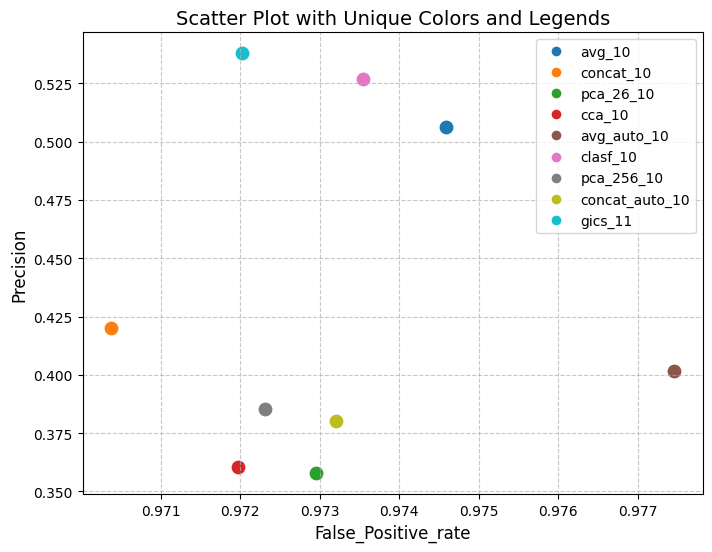

In [10]:
# Sample Data (Replace with your actual data)
possitive_prec = similar_df_results['Precision']
negative_prec = similar_df_results['False_Positive_rate']
names = similar_df_results['Classification_Scheme'].values

# Generate a unique color for each point
colors = plt.cm.get_cmap('tab10', len(names)).colors  # Use 'tab10' colormap for distinct colors

# Create figure
plt.figure(figsize=(8, 6))

# Dictionary to track labels for legend
legend_labels = {}

# Plot each point separately with a unique color
for i, name in enumerate(names):
    color = colors[i % len(colors)]  # Cycle through colors if there are more points than colors
    plt.scatter(negative_prec[i], possitive_prec[i], color=color, label=name, s=80)
    
    # Add label to legend only if not already added
    if name not in legend_labels:
        legend_labels[name] = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8)

# Add title and labels
plt.title('Scatter Plot with Unique Colors and Legends', fontsize=14)
plt.ylabel('Precision', fontsize=12)
plt.xlabel('False_Positive_rate', fontsize=12)

# Show legend
plt.legend(handles=legend_labels.values(), labels=legend_labels.keys(), loc='best')

# plt.xlim(0, 1)  # Set x-axis range from 0 to 100
# plt.ylim(0, 1)  # Set y-axis range from 0 to 100

# Show grid and plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## More experiments

Missing CIKs in pairs dataset: 0 (company A), 0 (company B)
CIKs not found in main dataset: 0 (company A), 0 (company B)
Total valid pairs: 2365
11420
8710
8710
8710
11420
11420
8710
8710
11285
Missing CIKs in pairs dataset: 0 (company A), 0 (company B)
CIKs not found in main dataset: 0 (company A), 0 (company B)
Total valid pairs: 2365
11420
8710
8710
8710
11420
11420
8710
8710
11285
Missing CIKs in pairs dataset: 0 (company A), 0 (company B)
CIKs not found in main dataset: 0 (company A), 0 (company B)
Total valid pairs: 2365
11420
8710
8710
8710
11420
11420
8710
8710
11285
Missing CIKs in pairs dataset: 0 (company A), 0 (company B)
CIKs not found in main dataset: 0 (company A), 0 (company B)
Total valid pairs: 2365
11420
8710
8710
8710
11420
11420
8710
8710
11285
Missing CIKs in pairs dataset: 0 (company A), 0 (company B)
CIKs not found in main dataset: 0 (company A), 0 (company B)
Total valid pairs: 2365
11420
8710
8710
8710
11420
11420
8710
8710
11285
Missing CIKs in pairs dataset:

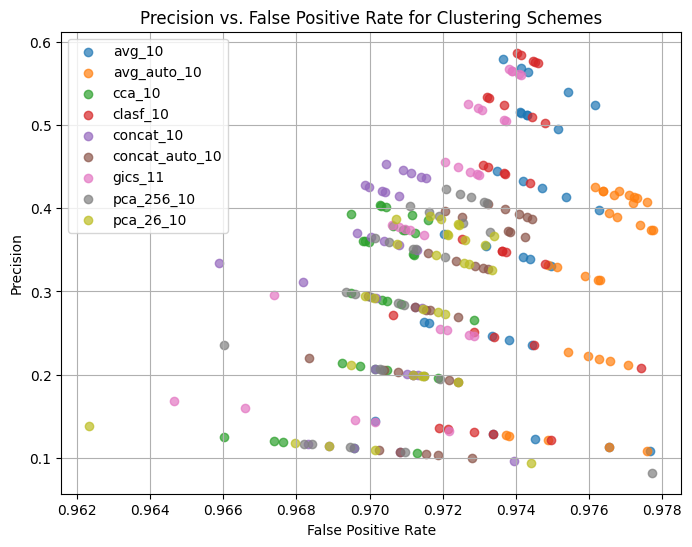

In [11]:
# Record multiple results
results_list = []
for i in range(1, 7):  # Call the function multiple times
    for _ in range(5):
        res = precision_and_false_positive(similar_df, merged_df, classification_columns_10, i*10)
        results_list.append(res.sort_values("Classification_Scheme"))

# Concatenate all results into a single DataFrame
results_df = pd.concat(results_list, ignore_index=True)

# Plot results
plt.figure(figsize=(8, 6))
for scheme in results_df["Classification_Scheme"].unique():
    subset = results_df[results_df["Classification_Scheme"] == scheme]
    plt.scatter(subset["False_Positive_rate"], subset["Precision"], label=scheme, alpha=0.7)

plt.xlabel("False Positive Rate")
plt.ylabel("Precision")
plt.title("Precision vs. False Positive Rate for Clustering Schemes")
plt.legend()
plt.grid(True)
plt.show()
